# 2/28/2022 : Linear and Logistic Regression

Hi everyone! In this notebook, we'll explore linear and logistic regression, two of the most fundamental algorithms for natural language processing

In this notebook, we have the following methods for you to fill out:
1. `lin_reg_cost()`
2. `lin_reg_derivative()`
3. `linear_grad_descent()`
4. `calc_lin_alg_thetas() (optional)`
5. `sigmoid()`
6. `log_cost()`
7. `log_grad_descent()`

At the end, we'll look at an application of logistic regression as a preview for next week: **Sentiment Analysis!**

We'll start by importing `numpy`, as well as `matplotlib` for graphing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Part 1: Calculating the cost for linear regression

Below, we have the function definition for `lin_reg_cost()`

Recall that the `cost` of our predicted values for linear regression can be calculated by the following formula:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\frac{1}{2m}\sum_{i&space;=&space;1}^{m}(predicted&space;-&space;actual)^2" title="\frac{1}{2m}\sum_{i = 1}^{m}(predicted - actual)^2" />

Calculate the `cost` according to that formula, and return the result

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>Try to use numpy functions! You might find <code>np.sum()</code> and <code>np.square()</code> very useful</li>

</ul>
</p>

In [2]:
def lin_reg_cost(predicted, actual, m):
    # your code here - calculate the cost for linear regression
    cost = ...
    return cost

In [3]:
# run this cell to test your code
np.random.seed(0)
predicted_test = np.random.random((4, 1))
actual_test = np.random.random((4, 1))
m_test = 30

calc_linear_reg_cost = lin_reg_cost(predicted_test, actual_test, m_test)

print("Outputted cost: {0}".format(calc_linear_reg_cost))
print("Expected cost: 0.0028013707428165427")

if (calc_linear_reg_cost == 0.0028013707428165427):
      print("Nice one!")
else:
      print("Yikes")

Outputted cost: 0.0028013707428165427
Expected cost: 0.0028013707428165427
Nice one!


## Part 2: Calculating the cost derivative for linear regression

Now that we have the `cost`, we will evaluate `lin_reg_derivative` for each slope of `lin_reg_cost`

The derivative of our `cost` function is:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\frac{1}{m}\sum_{i&space;=&space;1}^{m}[x_i&space;*&space;(predicted&space;-&space;actual)]" title="\frac{1}{m}\sum_{i = 1}^{m}[x_i * (predicted - actual)]" />

<br></br>
To avoid looping through every value, we can simplify this using matrix functions to calculate `cost` as:

<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;\frac{1}{m}&space;*&space;[X^T&space;\cdot&space;(predicted&space;-&space;actual)]" title="\frac{1}{m} * [X^T \cdot (predicted - actual)]" />

**Note: • represents the matirx dot product (matrix multiplication), and X = inputs**

Calculate the `derivative` and return its value

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>Make sure you are transposing the matrix and taking the dot product (not just multiplying)</li>
</ul>
</p>

In [4]:
def lin_reg_derivative(predicted, actual, inputs, m):
    # your code here - calculate the derivative of the linear regression cost function
    derivative = ...
    return derivative

In [5]:
# run this cell to test your code
np.random.seed(0)
predicted_test = np.random.random((4, 1))
actual_test = np.random.random((4, 1))
m_test = 30
inputs_test = np.random.random((4, 2))

calc_lin_deriv = np.round(lin_reg_derivative(predicted_test, actual_test, inputs_test, m_test), 7)

print("Expected values: [0.0081553, 0.0069101]")
print("Actual values: [{0}, {1}]".format(calc_lin_deriv[0][0], calc_lin_deriv[1][0]))

if (calc_lin_deriv.shape != (2, 1)):
    print("Incorrect dimensions")
elif (calc_lin_deriv[0] != 0.0081553):
    print("Incorrect value at index 0")
elif (calc_lin_deriv[1] != 0.0069101):
    print("Incorrect value at index 1")
else:
    print("You're all good here homie!")

Expected values: [0.0081553, 0.0069101]
Actual values: [0.0081553, 0.0069101]
You're all good here homie!


## Part 3: Testing your linear regression algorithm

Now that we have our `cost` and `cost derivative` values calculated, we can test our algorithm!

We will start by creating and plotting our data set

Text(0, 0.5, 'y')

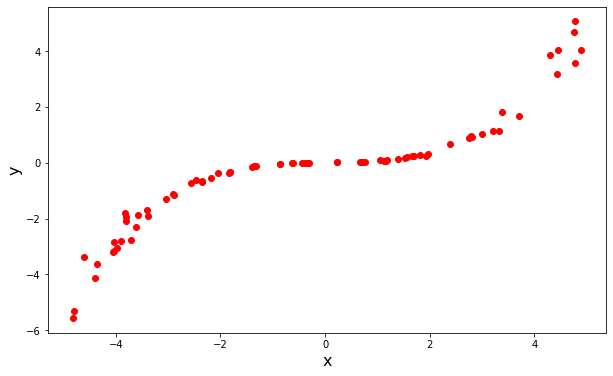

In [6]:
# initialize a random data set
random_x = np.random.random(75) * 10 - 5
random_y = 0.01 * (np.power(random_x, 3) * (np.random.random(75) * 2 + 3) + np.square(random_x) * (np.random.random(75) * 2 - 2) + random_x * (np.random.random(75) * 2 + 1) + np.random.random(75) * 2)

# graph this data
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.plot(random_x, random_y, 'ro')
plt.xlabel("x", fontsize = 16)
plt.ylabel("y", fontsize = 16)

A big part of modeling is deciding which function best fits our data

In this case, it's safe to assume that this function is:


<img src="https://latex.codecogs.com/png.latex?\dpi{150}&space;y&space;=&space;\Theta_0&space;&plus;&space;\Theta_1&space;x&space;&plus;&space;\Theta_2x^2&space;&plus;&space;\Theta_3x^3" title="y = \Theta_0 + \Theta_1 x + \Theta_2x^2 + \Theta_3x^3" />

Next we need to define our constants for gradient descent, namely: 

- `m`
- `learning_rate`
- `num_iterations`

Feel free to experiment with different values for `learning_rate` and `num_iterations`!

In [7]:
m = len(random_x)
learning_rate = 0.00001
num_iterations = 100000

We also need to define an array `lin_thetas` to store the values of our slopes and intercepts

For linear regression, we need to set our `lin_thetas` to be small, random, and with dimension of **(4, 1)**

Additionally, we need to set up our x and y values, `lin_reg_x` and `lin_reg_y`

In [8]:
# randomize our thetas
lin_thetas = np.random.random((4, 1)) - 0.5
# format our plot points for gradient descent
lin_reg_x = np.array([np.ones(m), random_x.T, np.square(random_x.T), np.power(random_x.T, 3)]).T
lin_reg_y = np.array([random_y]).T

This is where you are going to write the bulk of the logic for linear regression

Complete the function `linear_grad_descent`, which performs the following steps for each `iteration`:
1. Calculates the `predicted_y`
2. Calculates the `gradients`, the negative derivative of `thetas`, by using `lin_reg_derivative()`
3. Adjusts `thetas` appropriately, with a combination of `gradients` and `learning_rate`

At the end of the function, we should return the calculated value of `thetas`

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint for Step 1</b></font>
</summary>
<p>
<ul>
    <li><code>predicted_y</code> can be calculated by taking the dot product of <code>x</code> and <code>thetas</code></li>
</ul>
</p>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints for Step 2</b></font>
</summary>
<p>
<ul>
    <li>Use <code>lin_reg_derivative</code> to calculate <code>gradients</code></li>
    <li>Make sure you're using the right variables in the right spot of the method signature!</li>
</ul>
</p>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint for Step 3</b></font>
</summary>
<p>
<ul>
    <li>For each <code>iteration</code>, set <code>thetas</code> equal to <code>thetas - learning_rate * gradients</code></li>

</ul>
</p>

In [9]:
def linear_grad_descent(x, actual_y, thetas, learning_rate, m, num_iterations):
    # perform the algorithm for the specified number of iterations
    for iteration in range(num_iterations):
        # your code here - calculate predicted_y, gradients, and thetas
        predicted_y = ...
        gradients = ...
        thetas = ...
    return thetas

If your implementation is correct, you should see a very low `cost` value in the model we train below

(A good `cost` value for this problem would be anything less than 1, but the lower the better!)

In [10]:
# run this cell to get your thetas and check the cost value
calculated_thetas = linear_grad_descent(lin_reg_x, lin_reg_y, lin_thetas, learning_rate, m, num_iterations)
calculated_cost = lin_reg_cost(lin_reg_x @ calculated_thetas, lin_reg_y, m)
print("Calculated values for slopes and intercept: [{0}, {1}, {2}, {3}]".format(np.round(calculated_thetas[0][0], 4), np.round(calculated_thetas[1][0], 4), np.round(calculated_thetas[2][0], 4), np.round(calculated_thetas[3][0], 4)))
print("Cost for these values of theta: {0}".format(calculated_cost))

Calculated values for slopes and intercept: [-0.0537, -0.05, -0.0072, 0.0452]
Cost for these values of theta: 0.0436417018617489


Let's check your values against our data set!

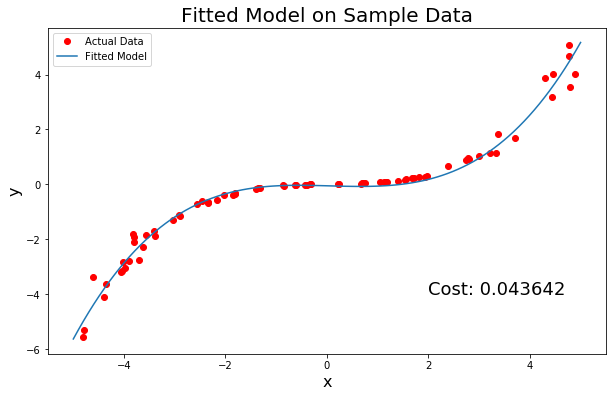

In [11]:
# get your predicted x and y values
graph_x = np.linspace(-5, 5, 100)
graph_y = calculated_thetas[3][0] * np.power(graph_x, 3) + calculated_thetas[2][0] * np.square(graph_x) + calculated_thetas[1][0] * graph_x + calculated_thetas[0][0]

# graph the values
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.plot(random_x, random_y, 'ro', label = "Actual Data")
plt.plot(graph_x, graph_y, label = "Fitted Model")
plt.xlabel("x", fontsize = 16)
plt.ylabel("y", fontsize = 16)
plt.title("Fitted Model on Sample Data", fontsize = 20)
plt.text(2, -4, "Cost: {0}".format(round(calculated_cost, 6)), fontsize = 18)
plt.legend()

Hopefully your data fits this model decently well. If it does, congratulations! You just wrote your first natural language processing model!

## Part 3b (Optional): Using the Linear Algebra Least Squares Regression Model

This step is optional, but there is a formula using pure matrix multiplication that can also solve this problem!

The formula is: 

<img src="https://latex.codecogs.com/gif.latex?\dpi{150}&space;\Theta&space;=&space;(X^T&space;\cdot&space;X)^{-1}&space;\cdot&space;(X^T&space;*&space;y)" title="\Theta = (X^T \cdot X)^{-1} \cdot (X^T * y)" />


Optionally complete `calc_lin_alg_thetas` to return the thetas using the given formula

**Note: • represents the matirx dot product (matrix multiplication), and ^-1 represents the inverse of a matrix, which can be computed by using `np.linalg.inv`**

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint</b></font>
</summary>
<p>
<ul>
    <li>Make sure you are doing your operations in the right order! If you're unsure, use parentheses to be safe</li>
</ul>
</p>

In [12]:
def calc_lin_alg_thetas(X, y):
    # (optional) your code here - calculate the thetas using linear algebra techniques
    lin_alg_thetas = ...
    return lin_alg_thetas

In [13]:
# print your calculated values
lin_alg_thetas = calc_lin_alg_thetas(lin_reg_x, lin_reg_y)
print("Calculated values for slopes and intercept: [{0}, {1}, {2}, {3}]".format(np.round(lin_alg_thetas[0][0], 4), np.round(lin_alg_thetas[1][0], 4), np.round(lin_alg_thetas[2][0], 4), np.round(lin_alg_thetas[3][0], 4)))
print("Cost for these values of theta: {0}".format(calculated_cost))

Calculated values for slopes and intercept: [0.0215, 0.0088, -0.0113, 0.042]
Cost for these values of theta: 0.0436417018617489


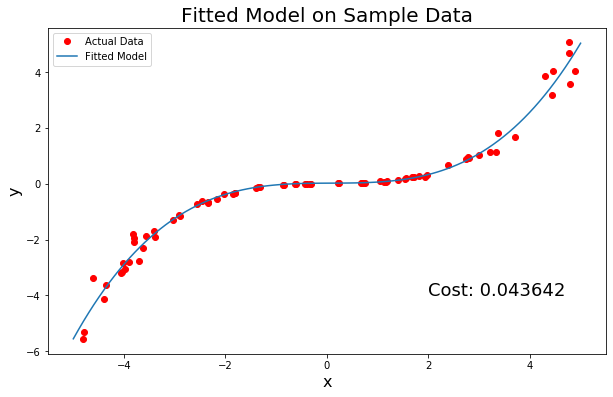

In [14]:
# get your predicted x and y values
graph_x = np.linspace(-5, 5, 100)
graph_y = lin_alg_thetas[3][0] * np.power(graph_x, 3) + lin_alg_thetas[2][0] * np.square(graph_x) + lin_alg_thetas[1][0] * graph_x + lin_alg_thetas[0][0]

# graph the values
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.plot(random_x, random_y, 'ro', label = "Actual Data")
plt.plot(graph_x, graph_y, label = "Fitted Model")
plt.xlabel("x", fontsize = 16)
plt.ylabel("y", fontsize = 16)
plt.title("Fitted Model on Sample Data", fontsize = 20)
plt.text(2, -4, "Cost: {0}".format(round(calculated_cost, 6)), fontsize = 18)
plt.legend()

You'll notice that our models are almost identical, so why would we use gradient descent?

Turns out, calculating np.linalg.inv is a very expensive computation $O(n^3)$, while gradient descent is much faster and only takes $O(n^2)$ time

Now, we'll be taking a look at the logistic regression model

## Part 4: Sigmoid Function

Since we're classifying either 0 or 1, we need to first implement the `sigmoid` function

Recall the formula for sigmoid:
    <img src="https://latex.codecogs.com/gif.latex?\dpi{150}&space;\frac{1}{1&space;&plus;&space;e^{-x}}" title="\frac{1}{1 + e^{-x}}" />
    
Complete the function `sigmoid()` by calculating `sigmoid_val` according to the formula and returning its value

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint</b></font>
</summary>
<p>
<ul>
    <li>Use <code>np.exp(-x)</code> to find e^(-x)</li>
</ul>
</p>

In [15]:
def sigmoid(x):
    # your code here - calculate the value of the sigmoid function
    sigmoid_val = ...
    return sigmoid_val

In [16]:
# run this cell to test your sigmoid function
print("Expected value for 0: 0.5")
print("Your value for 0: {0}".format(sigmoid(0)))
print("---")
print("Expected value for -0.12345: 0.46917663548322924")
print("Your value for -0.12345: {0}".format(sigmoid(-0.12345)))
print("---")
if (sigmoid(0) != 0.5):
    print("Incorect value for 0")
elif (sigmoid(-0.12345) != 0.46917663548322924):
    print("Incorrect value for -0.12345")
else:
    print("Everything checks out here!")

Expected value for 0: 0.5
Your value for 0: 0.5
---
Expected value for -0.12345: 0.46917663548322924
Your value for -0.12345: 0.46917663548322924
---
Everything checks out here!


## Part 5: Implementing the logistic cost function

Unfortunately, the logistic cost function is different from the linear cost function, but at least the derivatives are the same!

Complete `log_cost()` below, which uses the following formula:

<img src="https://latex.codecogs.com/gif.latex?\dpi{150}&space;-\frac{1}{m}&space;*&space;\sum_{i&space;=&space;1}^{m}&space;(y_i&space;\cdot&space;log(y_{actual_i})&space;&plus;&space;(1&space;-&space;y_i)^T&space;*&space;log(y_{actual_i}))" title="-\frac{1}{m} * \sum_{i = 1}^{m} (y_i \cdot log(y_{actual_i}) + (1 - y_i)^T * log(y_{actual_i}))" />

Using matrix operations, this can be simplified to:

<img src="https://latex.codecogs.com/gif.latex?\dpi{150}&space;-\frac{1}{m}&space;*&space;sum(y^T&space;\cdot&space;log(y_{actual})&space;&plus;&space;(1&space;-&space;y)^T&space;*&space;log(y_{actual}))" title="-\frac{1}{m} * sum(y^T \cdot log(y_{actual}) + (1 - y)^T * log(y_{actual}))" />

Calculate the value of `cost` and return its values in `log_cost()`

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li><code>np.sum()</code> will calculate the <code>sum()</code> needed in the second formula</li>
    <li>Use <code>np.log()</code> to get the natural log of a numpy array</li>
    <li>Make sure you are doing your operations in the right order! If you're unsure, use parentheses to be safe</li>
</ul>
</p>

In [17]:
def log_cost(y_pred, y_actual, m):
    # your code here - calculate the value of the cost for logistic regression
    cost = ...
    return cost

In [18]:
# run this cell to test your function
np.random.seed(1)
test_cost = log_cost(np.random.random((3, 4)), np.random.random((3, 1)), 10)
print("Expected cost: 1.3342780005346437")
print("Your cost: {0}".format(test_cost))
print("---")
if (test_cost != 1.3342780005346437):
    print("You gotta fix that cost function :(")
else:
    print("Good job!")

Expected cost: 1.3342780005346437
Your cost: 1.3342780005346437
---
Good job!


## Part 6: Creating our logistic regression model

Now that we have everything we need, we can create our model!

First, we'll start by creating a dataset

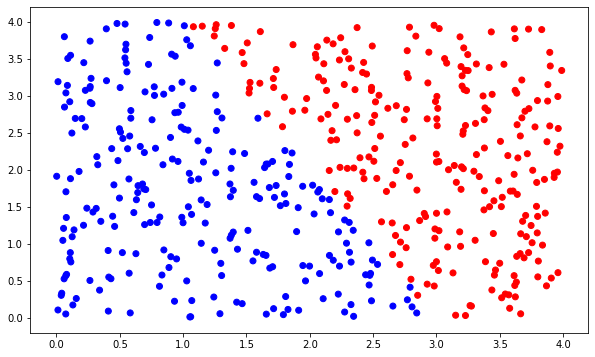

In [19]:
# visualization of data set
plot_log_x = np.random.random(500) * 4
plot_log_y = np.random.random(500) * 4
plot_classification = (3 - plot_log_x - 0.5 * plot_log_y > 0)

plt.scatter(plot_log_x, plot_log_y, c = plot_classification, cmap = "bwr_r")

fig = plt.gcf()
fig.set_size_inches(10, 6)

You'll see a clear "divide" between the data. Our goal is to find the equation of the line that divides this data into red and blue halves

First, let's define our constants again for gradient descent

In [20]:
m = len(plot_log_x)
learning_rate = 0.5
num_iterations = 10000

Next, we'll format our inputs, outputs, and thetas into numpy arrays

In [21]:
log_input = np.array([np.ones(m), plot_log_x, plot_log_y]).T
log_output = np.array([1 * plot_classification]).T
log_thetas = np.random.random((3, 1)) - 0.5

Now, you're going to write most of the logic for `log_grad_descent()`

The algorithm follows these general steps for each `iteration`:
1. Find `pred_output`, using `x` and `thetas` and mapping its value to 0 or 1 using the `sigmoid` function
2. Calculate the `gradients`, using the same cost derivative in `linear_grad_descent()`
3. Update `thetas` by subtracting the `learning_rate` times the `gradients`

Afterwards, it returns `thetas`

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint for Step 1</b></font>
</summary>
<p>
<ul>
    <li><code>pred_output</code> can be calculated by taking the <code>sigmoid()</code> of the dot product of <code>x</code> and <code>thetas</code></li>
</ul>
</p>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints for Step 2</b></font>
</summary>
<p>
<ul>
    <li>Just like in linear gradient descent, use <code>lin_reg_derivative</code> to calculate <code>gradients</code></li>
    <li>Make sure you're using the right variables in the right spot of the method signature!</li>
</ul>
</p>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint for Step 3</b></font>
</summary>
<p>
<ul>
    <li>For each <code>iteration</code>, set <code>thetas</code> equal to <code>thetas - learning_rate * gradients</code></li>

</ul>
</p>

In [22]:
def log_grad_descent(x, actual_y, thetas, learning_rate, m, num_iterations):
    # perform the algorithm for the specified number of iterations
    for iteration in range(num_iterations):
        # your code here - calculate pred_output, gradients, and thetas for each iteration
        pred_output = ...
        gradients = ...
        thetas = ...
    return thetas

In [23]:
# print our calculated values and cost (we divide our thetas by the minimum value to be used for graphing)
calculated_thetas = log_grad_descent(log_input, log_output, log_thetas, learning_rate, m, num_iterations)
calculated_thetas = calculated_thetas / np.amin(calculated_thetas)
calculated_cost = log_cost(sigmoid(log_input @ calculated_thetas), log_output, m)
print("Calculated values for slopes and intercept: [{0}, {1}, {2}]".format(np.round(calculated_thetas[0][0], 4), np.round(calculated_thetas[1][0], 4), np.round(calculated_thetas[2][0], 4)))
print("Cost for these values of theta: {0}".format(calculated_cost))

Calculated values for slopes and intercept: [-3.0178, 1.0, 0.5038]
Cost for these values of theta: 1.4222341078764034


Note that our `cost` for this algorithm is slightly higher than linear regression (should be around one)

This is because the logistic regression data has a lot more variability/randomness than the linear regression data

Let's validate our data by plotting it below:

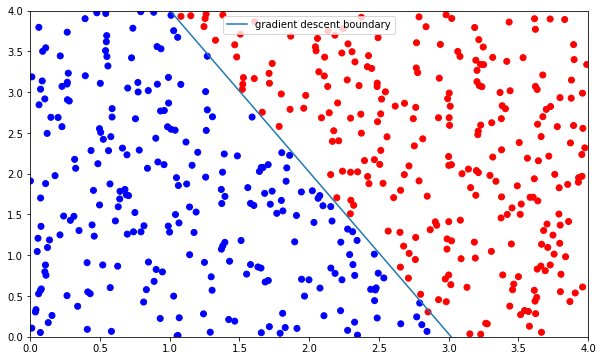

In [24]:
# plot our findings
plot_classification = (3 - plot_log_x - 0.5 * plot_log_y > 0)
plt.scatter(plot_log_x, plot_log_y, c = plot_classification, cmap = "bwr_r")

plt.ylim(0, 4)
plt.xlim(0, 4)

plt.plot([0, calculated_thetas[0][0] / (-calculated_thetas[1][0])], [calculated_thetas[0][0] / (-calculated_thetas[2][0]),0], label="gradient descent boundary")

plt.legend()
fig = plt.gcf()
fig.set_size_inches(10, 6)

If you see a line dividing our data by color, good job! You just successfully implemented logistic regression!

## Preview of next week: Sentiment Analysis

Below we have a preview of what we could work on next week: obtaining the sentiment of a tweet using our logistic regression model

Feel free to look over this code if you want, but you'll be able to test your own custom inputs in the next section

*Disclaimer: Most of this logic was taken from coursework from Coursera.com*

In [25]:
# necesarry inputs 
import nltk
from os import getcwd

nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\nishu\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nishu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
# set our file path
filePath = f"{getcwd()}/../tmp2/"
nltk.data.path.append(filePath)

In [27]:
# more needed imports
import pandas as pd
from nltk.corpus import twitter_samples 
from Utils import build_freqs, process_tweet

In [28]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [29]:
# split the data into two pieces, one for training and one for testing (validation set) 
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

# create the list of dictionaries
freqs = build_freqs(train_x, train_y)

In [30]:
# function to extract features from the tweet
def extract_features(tweet, freqs):
    word_l = process_tweet(tweet)
    x = np.zeros((1, 3)) 
    x[0,0] = 1 
    # loop through each word in the list of words
    for word in word_l:
        if (word, 1.0) in freqs:
            x[0,1] += freqs.get((word, 1.0), 1)
        if (word, 0.0) in freqs:
            x[0,2] += freqs.get((word, 0.0), 1)
    assert(x.shape == (1, 3))
    return x

In [31]:
# create our inputs and outputs
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)
Y = train_y

# Apply gradient descent
tweet_thetas = log_grad_descent(X, Y, np.zeros((3, 1)), 1e-9, X.shape[0], 1500)

## Try your own custom tweets!

Below we have defined a function to process tweets. As you can see, it's not very complicated

In the cell after that, try typing in your own tweet to see how the classifier does!

In [32]:
# function to return the sentiment of a custom tweet
def predict_tweet(tweet, freqs, theta):
    x = extract_features(tweet, freqs)
    y_pred = sigmoid(x @ theta)    
    return "Positive Sentiment" if y_pred > 0.5 else "Negative Sentiment"

In [33]:
# change this tweet and see what the model predicts!
tweet = "I hate Jack Nash!"
print(predict_tweet(tweet, freqs, tweet_thetas))

Negative Sentiment
